In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [120]:
loss_per_iteration=pd.read_csv("results/batch_bioprocess_loss_per_iteration.csv",index_col=0).T
failed=np.where(loss_per_iteration==-1)[0]
failed=[str(i) for i in failed]
exclude=np.setdiff1d(loss_per_iteration.index.to_list(),failed)
loss_per_iteration=loss_per_iteration.filter(items=list(exclude),axis=0)

loss_per_iteration.fillna(0,inplace=True)




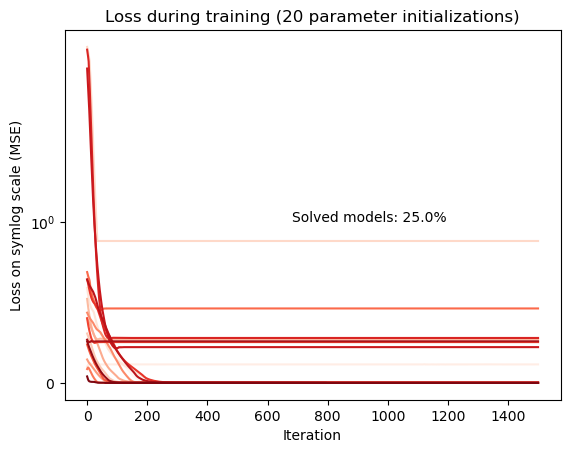

In [141]:

fig,ax=plt.subplots()

# # Your existing code
# Your existing code
for i in range(np.shape(loss_per_iteration)[0]):
    ax.plot(loss_per_iteration.iloc[i, :], color=plt.cm.Reds(i / np.shape(loss_per_iteration)[0]))

# solved_models=np.round(np.sum(loss_per_iteration[len(loss_per_iteration)]==0)/np.shape(loss_per_iteration)[0]*100,2)

final_iteration=loss_per_iteration.iloc[:,np.shape(loss_per_iteration)[1]-1]
percentage_of_models=np.sum(final_iteration==0)/np.shape(loss_per_iteration)[0]*100


annotation="Solved models: "+str(percentage_of_models)+ "%"
plt.yscale("symlog")
plt.title("Loss during training ("+ str(np.shape(loss_per_iteration)[0])+" parameter initializations)")
plt.xlabel("Iteration")
plt.ylabel("Loss on symlog scale (MSE)")
plt.annotate(annotation,xy=(680,1))
plt.show()



In [165]:
optimized_parameters=pd.read_csv("results/batch_bioprocess_optimized_parameters.csv",index_col=0).T
loss_per_iteration=pd.read_csv("results/batch_bioprocess_loss_per_iteration.csv",index_col=0).T

true_parameters={"qsmax":-0.3,"Ks":0.01,"a":-1.6,"ms":-0.01}
parameter_deviation=np.abs(optimized_parameters-pd.Series(true_parameters))

failed=np.where(loss_per_iteration==-1)[0]
failed=[str(i) for i in failed]
exclude=np.setdiff1d(loss_per_iteration.index.to_list(),failed)
loss_per_iteration=loss_per_iteration.filter(items=list(exclude),axis=0)

loss_per_iteration.fillna(0,inplace=True)


final_iteration=loss_per_iteration.iloc[:,np.shape(loss_per_iteration)[1]-1]
solved=np.where(final_iteration<=0.001)[0]
failed=np.where(final_iteration>=0.001)[0]

solved_models=parameter_deviation.iloc[solved,:]
failed_models=parameter_deviation.iloc[failed,:]

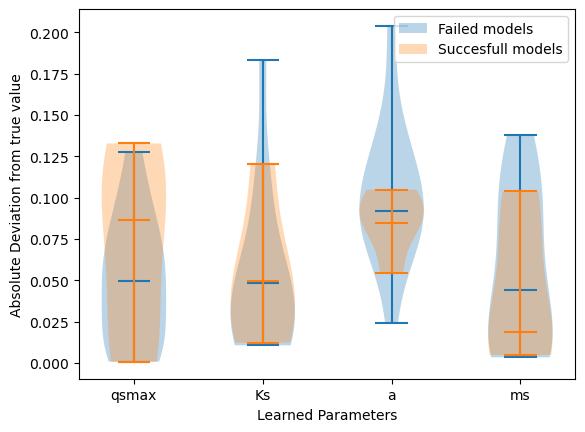

In [167]:



fig, ax = plt.subplots()
vp1 = ax.violinplot(failed_models, positions=[1, 2, 3, 4], showmedians=True)
vp2 = ax.violinplot(solved_models, positions=[1, 2, 3, 4], showmedians=True)
                    
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(optimized_parameters.columns)
plt.xlabel("Learned Parameters")
plt.ylabel("Absolute Deviation from true value")

# Creating legend labels
legend_labels = ['Failed models', 'Succesfull models']

# Adding legend
ax.legend([vp1["bodies"][0], vp2["bodies"][0]], legend_labels)
plt.show()

,qsmax,Ks,a,ms
0,0.042626,0.026033,0.100913,0.089753
1,0.031201,0.183493,0.115714,0.005837
2,0.108596,0.049404,0.054348,0.103734
3,0.006384,0.103229,0.091931,0.003629
4,0.127844,0.011297,0.024382,0.137776
5,0.077326,0.053724,0.126064,0.095831
6,0.012893,0.050292,0.108924,0.005435
7,0.000719,0.018007,0.084740,0.075574
8,0.086647,0.012407,0.084886,0.019097
9,0.014902,0.048291,0.128351,0.006201
